# Using SVM to Predict Who is a Credit Risk

# 1. Necessary Imports

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# 2. Import Data, Merge into a New Dataset

In [3]:
# payment_data.csv contains data of about a customer's payment history
# customer_data.csv contains demographic data of each customer
# These datasets were merged in the following function.

def import_data():
    payment_data = pd.read_csv("payment_data.csv")
    customer_data = pd.read_csv("customer_data.csv")
    df = pd.merge(customer_data,payment_data)
    
    return df

# 3. Preprocess

In [4]:
from sklearn.preprocessing import StandardScaler

# Preprocessing the data before SVM. Data is scaled using StandardScaler for better results.

def preprocess(df):
    df.drop_duplicates()
    df.dropna(inplace=True)
    
#     Encode categorical features
#     This line was not used, column was removed.
#     df = pd.get_dummies(df, columns=['prod_code'])

#     # Impute missing values
#     This line is not used, column was removed.
#     df['prod_limit'].fillna(df['prod_limit'].mean(), inplace=True)

    df['fea_2'].fillna(df['fea_2'].median(), inplace=True)
    df['highest_balance'].fillna(df['highest_balance'].median(), inplace=True)
    
#     Useless code, these columns were removed.
#     df['update_date'] = pd.to_datetime(df['update_date'], format='%d/%m/%Y')
#     df['report_date'] = pd.to_datetime(df['report_date'], format='%d/%m/%Y')
#     df['update_date'] = df['update_date'].apply(lambda x: pd.Timestamp(x).timestamp())
#     df['report_date'] = df['report_date'].apply(lambda x: pd.Timestamp(x).timestamp())

    # Scale numerical features
    scaler = StandardScaler()
    #num_cols = ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_limit', 'new_balance', 'highest_balance', 'update_date', 'report_date']
    num_cols = ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'new_balance', 'highest_balance']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    df = df[['label', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'new_balance', 'highest_balance']]
    
    return df

# 4. Distribution of the Classes

In [5]:
# Information used to verify preprocess steps worked (dropping duplicates etc.):

# Original shape:
# df.shape = (8250, 24)

# After preprocessing:
# df.shape = (1697, 19)

# df['label'].value_counts()

# Running the function just shows high-risk and low-risk categories plotted using only feature 'OVD_t1' (Overdue payments
# of type 1). This function was just used to verify the previous steps worked.

def plot():
    low_credit_df = df[df['label'] == 0][0:200]
    high_credit_df = df[df['label'] == 1][0:200]
    axes = low_credit_df.plot(kind = 'scatter', x = 'OVD_t1', y = 'highest_balance', color = 'blue', label = 'low-risk')
    high_credit_df.plot(kind = 'scatter', x = 'OVD_t1', y = 'highest_balance', color = 'red', label = 'high-risk', ax = axes)
    
# plot()

# 5. Remove Unwanted Columns

In [6]:
# Removed update_date, reported_date, prod_limit, and prod_code to shorten linear kernel learning time and also because they
# were not relevant to the results (This was done in Section 3. Preprocess). Poor accuracy when they were included 
# (See Section 9).

def get_X_y(df):
    feature_df = df

    # Independent variables (features)
    X = np.asarray(feature_df)

    # Dependent variables
    y = np.asarray(df['label'])
    
    return X, y

# 6. Divide into training and test data

In [7]:
# feature_df (1697) -> Train (no. rows) / Test (no. rows) ## 80/20 split
# Train(X, y) ## X is a 2D array and y is a 1D array
# Test(X, y)

from sklearn.model_selection import train_test_split

def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    return X_train, X_test, y_train, y_test

# 7. Evaluation Results

In [17]:
from sklearn import svm
from sklearn.metrics import classification_report

def linear_results(X_test, X_train, y_test, y_train):
    # C is the regularization parameter
    linear_classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 3)
    linear_classifier.fit(X_train, y_train)
    y_predict = linear_classifier.predict(X_test)
    print(classification_report(y_test, y_predict, zero_division = 0))
    
def poly_results(X_test, X_train, y_test, y_train):
    degrees = 10
    for i in range(1, degrees):
        poly_classifier = svm.SVC(kernel = 'poly', gamma = 'auto', degree = i,  C = 3)
        poly_classifier.fit(X_train, y_train)
        y_predict = poly_classifier.predict(X_test)
#         print(y_predict)
        print("Degree:", i)
        print(classification_report(y_test, y_predict, zero_division = 0))
    
def rbf_results(X_test, X_train, y_test, y_train):
    RBF_classifier = svm.SVC(kernel = 'rbf', gamma = 'auto', C = 2)
    RBF_classifier.fit(X_train, y_train)
    y_predict = RBF_classifier.predict(X_test)
    print(classification_report(y_test, y_predict, zero_division = 0))

In [9]:
# Runs the functions

df = import_data()
df = preprocess(df)
X, y = get_X_y(df)
X_train, X_test, y_train, y_test = split(X, y)

# 8. Verifying Shapes Etc.

In [10]:
# X_test.shape

In [11]:
# X_train.shape

In [12]:
# y_train.shape

In [13]:
# y_test.shape

In [14]:
# print(y_test)
# y_test:
# [0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
#  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
#  1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
#  1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
#  1 1 0 0 0 0 1]

# 9. Results Before Removing Unwanted Columns

In [15]:
# Before removing:

# Linear Kernel Results:
# No results after 24 hrs+ of running

# Poly Kernel Results:
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00       299
#            1       0.12      1.00      0.22        41

#     accuracy                           0.12       340
#    macro avg       0.06      0.50      0.11       340
# weighted avg       0.01      0.12      0.03       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00       299
#            1       0.12      1.00      0.22        41

#     accuracy                           0.12       340
#    macro avg       0.06      0.50      0.11       340
# weighted avg       0.01      0.12      0.03       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00       299
#            1       0.12      1.00      0.22        41

#     accuracy                           0.12       340
#    macro avg       0.06      0.50      0.11       340
# weighted avg       0.01      0.12      0.03       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00       299
#            1       0.12      1.00      0.22        41

#     accuracy                           0.12       340
#    macro avg       0.06      0.50      0.11       340
# weighted avg       0.01      0.12      0.03       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00       299
#            1       0.12      1.00      0.22        41

#     accuracy                           0.12       340
#    macro avg       0.06      0.50      0.11       340
# weighted avg       0.01      0.12      0.03       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00       299
#            1       0.12      1.00      0.22        41

#     accuracy                           0.12       340
#    macro avg       0.06      0.50      0.11       340
# weighted avg       0.01      0.12      0.03       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00       299
#            1       0.12      1.00      0.22        41

#     accuracy                           0.12       340
#    macro avg       0.06      0.50      0.11       340
# weighted avg       0.01      0.12      0.03       340

# RBF:

# C = 3
#               precision    recall  f1-score   support

#            0       0.94      1.00      0.97       299
#            1       1.00      0.54      0.70        41

#     accuracy                           0.94       340
#    macro avg       0.97      0.77      0.83       340
# weighted avg       0.95      0.94      0.94       340

# RBF Results:
# 0.94 Accuracy using C = 3
# Very little change in accuracy using other C values.

# 10. Getting and Storing Results

In [18]:
poly_results(X_test, X_train, y_test, y_train)

Degree: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00        41

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340

Degree: 2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       299
           1       0.97      0.83      0.89        41

    accuracy                           0.98       340
   macro avg       0.97      0.91      0.94       340
weighted avg       0.98      0.98      0.98       340

Degree: 3
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       299
           1       0.97      0.90      0.94        41

    accuracy                           0.99       340
   macro avg       0.98      0.95      0.96       340
weighted avg       0.99      0.99      0.99 

In [19]:
rbf_results(X_test, X_train, y_test, y_train)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       299
           1       1.00      0.93      0.96        41

    accuracy                           0.99       340
   macro avg       1.00      0.96      0.98       340
weighted avg       0.99      0.99      0.99       340



In [25]:
# linear_results(X_test, X_train, y_test, y_train)

In [18]:
# RBF Results

# C = 0.1
#               precision    recall  f1-score   support

#            0       0.88      1.00      0.94       299
#            1       0.00      0.00      0.00        41

#     accuracy                           0.88       340
#    macro avg       0.44      0.50      0.47       340
# weighted avg       0.77      0.88      0.82       340

# C = 1
#             precision    recall  f1-score   support

#            0       0.99      1.00      1.00       299
#            1       1.00      0.93      0.96        41

#     accuracy                           0.99       340
#    macro avg       1.00      0.96      0.98       340
# weighted avg       0.99      0.99      0.99       340

# C = 2
#               precision    recall  f1-score   support

#            0       0.99      1.00      1.00       299
#            1       1.00      0.93      0.96        41

#     accuracy                           0.99       340
#    macro avg       1.00      0.96      0.98       340
# weighted avg       0.99      0.99      0.99       340

# C = 3
#               precision    recall  f1-score   support

#            0       0.99      1.00      1.00       299
#            1       1.00      0.93      0.96        41

#     accuracy                           0.99       340
#    macro avg       1.00      0.96      0.98       340
# weighted avg       0.99      0.99      0.99       340


In [20]:
# Linear Results:

# C = 0.1
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

# C = 1
# precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

# C = 2
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

# C = 3
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00       299
#            1       1.00      1.00      1.00        41

#     accuracy                           1.00       340
#    macro avg       1.00      1.00      1.00       340
# weighted avg       1.00      1.00      1.00       340

In [22]:
# C = 0.1
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.89      1.00      0.94       299
#            1       1.00      0.10      0.18        41

#     accuracy                           0.89       340
#    macro avg       0.94      0.55      0.56       340
# weighted avg       0.90      0.89      0.85       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.89      1.00      0.94       299
#            1       0.80      0.10      0.17        41

#     accuracy                           0.89       340
#    macro avg       0.84      0.55      0.56       340
# weighted avg       0.88      0.89      0.85       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.67      0.10      0.17        41

#     accuracy                           0.89       340
#    macro avg       0.78      0.55      0.55       340
# weighted avg       0.86      0.89      0.85       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.60      0.07      0.13        41

#     accuracy                           0.88       340
#    macro avg       0.74      0.53      0.53       340
# weighted avg       0.85      0.88      0.84       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.50      0.07      0.13        41

#     accuracy                           0.88       340
#    macro avg       0.69      0.53      0.53       340
# weighted avg       0.84      0.88      0.84       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.93       299
#            1       0.43      0.07      0.12        41

#     accuracy                           0.88       340
#    macro avg       0.66      0.53      0.53       340
# weighted avg       0.83      0.88      0.84       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.38      0.07      0.12        41

#     accuracy                           0.87       340
#    macro avg       0.63      0.53      0.53       340
# weighted avg       0.82      0.87      0.83       340

# C = 1 
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.93      0.99      0.96       299
#            1       0.90      0.44      0.59        41

#     accuracy                           0.93       340
#    macro avg       0.91      0.72      0.77       340
# weighted avg       0.92      0.93      0.92       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.60      0.15      0.24        41

#     accuracy                           0.89       340
#    macro avg       0.75      0.57      0.59       340
# weighted avg       0.86      0.89      0.85       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.90      0.99      0.94       299
#            1       0.64      0.17      0.27        41

#     accuracy                           0.89       340
#    macro avg       0.77      0.58      0.60       340
# weighted avg       0.87      0.89      0.86       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.89      0.99      0.94       299
#            1       0.60      0.15      0.24        41

#     accuracy                           0.89       340
#    macro avg       0.75      0.57      0.59       340
# weighted avg       0.86      0.89      0.85       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.94       299
#            1       0.55      0.15      0.23        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.56      0.58       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.50      0.12      0.20        41

#     accuracy                           0.88       340
#    macro avg       0.70      0.55      0.57       340
# weighted avg       0.84      0.88      0.85       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.89      0.98      0.93       299
#            1       0.50      0.12      0.20        41

#     accuracy                           0.88       340
#    macro avg       0.70      0.55      0.57       340
# weighted avg       0.84      0.88      0.85       340

# C = 2
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.97      1.00      0.99       299
#            1       1.00      0.80      0.89        41

#     accuracy                           0.98       340
#    macro avg       0.99      0.90      0.94       340
# weighted avg       0.98      0.98      0.98       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.90      0.99      0.94       299
#            1       0.71      0.24      0.36        41

#     accuracy                           0.90       340
#    macro avg       0.81      0.62      0.65       340
# weighted avg       0.88      0.90      0.87       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.90      0.99      0.94       299
#            1       0.64      0.17      0.27        41

#     accuracy                           0.89       340
#    macro avg       0.77      0.58      0.60       340
# weighted avg       0.87      0.89      0.86       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.58      0.17      0.26        41

#     accuracy                           0.89       340
#    macro avg       0.74      0.58      0.60       340
# weighted avg       0.86      0.89      0.86       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# C = 3
# Degree: 3
#               precision    recall  f1-score   support

#            0       0.99      1.00      0.99       299
#            1       0.97      0.90      0.94        41

#     accuracy                           0.99       340
#    macro avg       0.98      0.95      0.96       340
# weighted avg       0.99      0.99      0.99       340

# Degree: 4
#               precision    recall  f1-score   support

#            0       0.92      0.99      0.95       299
#            1       0.78      0.34      0.47        41

#     accuracy                           0.91       340
#    macro avg       0.85      0.66      0.71       340
# weighted avg       0.90      0.91      0.89       340

# Degree: 5
#               precision    recall  f1-score   support

#            0       0.91      0.98      0.94       299
#            1       0.69      0.27      0.39        41

#     accuracy                           0.90       340
#    macro avg       0.80      0.63      0.66       340
# weighted avg       0.88      0.90      0.88       340

# Degree: 6
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.58      0.17      0.26        41

#     accuracy                           0.89       340
#    macro avg       0.74      0.58      0.60       340
# weighted avg       0.86      0.89      0.86       340

# Degree: 7
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 8
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.94       299
#            1       0.54      0.17      0.26        41

#     accuracy                           0.88       340
#    macro avg       0.72      0.58      0.60       340
# weighted avg       0.85      0.88      0.85       340

# Degree: 9
#               precision    recall  f1-score   support

#            0       0.90      0.98      0.93       299
#            1       0.50      0.17      0.25        41

#     accuracy                           0.88       340
#    macro avg       0.70      0.57      0.59       340
# weighted avg       0.85      0.88      0.85       340

# 11. Plotting

In [32]:
# Plot before removing features

# Plot for linear results:

def linear_plot():
    # C values
    x = [0.1, 1, 2, 3]
    
    # Accuracy
    y = [1, 1, 1, 1]
    
    plt.plot(x, y)
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Linear Kernel Accuracy vs. C')
    plt.show

# Plot for poly results:

def poly_plot():
# Degrees
    x = [3, 4, 5, 6, 7, 8, 9]
# C = 0.1
    y = [0.89, 0.89, 0.89, 0.88, 0.88, 0.88, 0.87]
    y2 = [0.93, 0.89, 0.89, 0.89, 0.88, 0.88, 0.88]
    y3 = [0.98, 0.90, 0.89, 0.89, 0.88, 0.88, 0.88]
    y4 = [0.99, 0.91, 0.90, 0.89, 0.88, 0.88, 0.88]
    plt.plot(x, y, marker='o',color='red', label = 'C = 0.1', linewidth=2)
    plt.plot(x, y2, marker='o',color='orange', label = 'C = 1', linewidth=2)
    plt.plot(x, y3, marker='o',color='yellow' , label = 'C = 2', linewidth=2)
    plt.plot(x, y4, marker='o',color='green' , label = 'C = 3', linewidth=2)
    plt.legend(loc='upper right')
    plt.xlabel('Degree')
    plt.ylabel('Accuracy')
    plt.title('Poly Kernel Accuracy vs. Degree')
    plt.show

# Plot for rbf results
def rbf_plot():
    x = [0.1, 1, 2, 3]
    y = [0.88, 0.99, 0.99, 0.99]
    plt.plot(x, y)
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('RBF Kernel Accuracy vs. C')
    plt.show

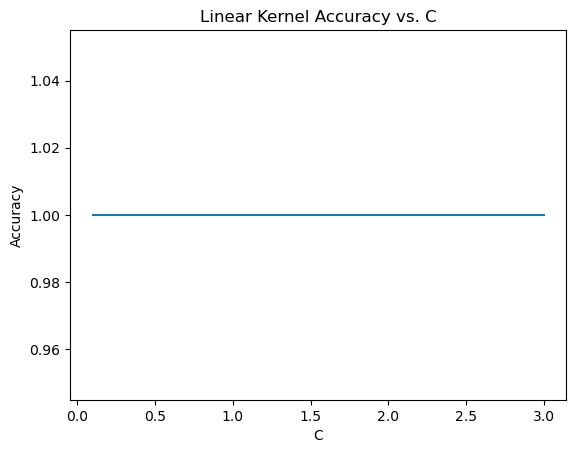

In [26]:
linear_plot()

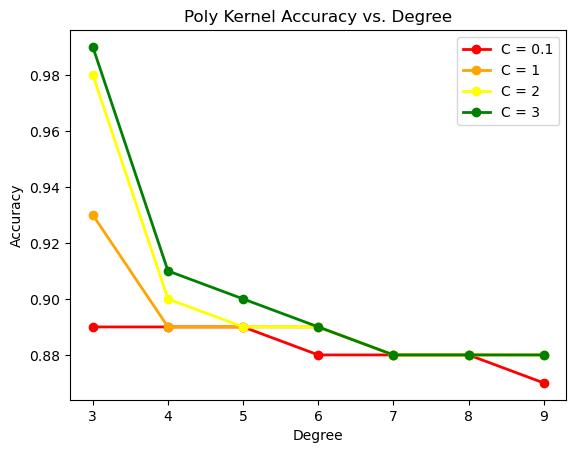

In [33]:
poly_plot()

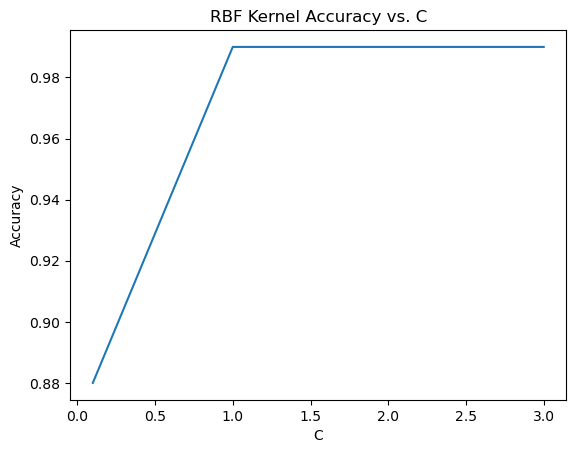

In [34]:
rbf_plot()